##Importing


In [222]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV

#!pip install yfinance #If it is not installed
import yfinance as yf

###Yfinance

In [225]:
# Define the ticker symbol
ticker_symbol = "KO"  # Sybmol of Coco cola

# Get data for the last 5 years
stock_data = yf.download(ticker_symbol, period="5y",auto_adjust=True,actions=True)

# Display the first few rows of the data
display(stock_data.head())

[*********************100%***********************]  1 of 1 completed


Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,KO,KO,KO,KO,KO,KO,KO
Date,,,,,,,
2020-08-03,39.785023,0.0,40.695869,39.724873,40.506825,0.0,14137500
2020-08-04,40.120132,0.0,40.266213,39.716270,39.776419,0.0,11717200
2020-08-05,40.575558,0.0,40.618521,40.223250,40.300586,0.0,10498700
2020-08-06,40.798969,0.0,40.841933,40.042795,40.094354,0.0,10745000
2020-08-07,41.073940,0.0,41.314543,40.566961,40.790377,0.0,11669700


In [226]:
# Changing the index
stock_data.reset_index(inplace=True)

In [227]:
display(stock_data.head())

Price,Date,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,,KO,KO,KO,KO,KO,KO,KO
0,2020-08-03,39.785023,0.0,40.695869,39.724873,40.506825,0.0,14137500
1,2020-08-04,40.120132,0.0,40.266213,39.716270,39.776419,0.0,11717200
2,2020-08-05,40.575558,0.0,40.618521,40.223250,40.300586,0.0,10498700
3,2020-08-06,40.798969,0.0,40.841933,40.042795,40.094354,0.0,10745000
4,2020-08-07,41.073940,0.0,41.314543,40.566961,40.790377,0.0,11669700


In [228]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (Date, )            1256 non-null   datetime64[ns]
 1   (Close, KO)         1256 non-null   float64       
 2   (Dividends, KO)     1256 non-null   float64       
 3   (High, KO)          1256 non-null   float64       
 4   (Low, KO)           1256 non-null   float64       
 5   (Open, KO)          1256 non-null   float64       
 6   (Stock Splits, KO)  1256 non-null   float64       
 7   (Volume, KO)        1256 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 78.6 KB


##Data Cleaning

Since we are using Yfinance, the data should not have any null values.

In [229]:
stock_data.isnull().sum()

,,0
Price,Ticker,
Date,,0
Close,KO,0
Dividends,KO,0
High,KO,0
Low,KO,0
Open,KO,0
Stock Splits,KO,0
Volume,KO,0


In [230]:
# Remove the 'Ticker' level from the columns
stock_data.columns = stock_data.columns.droplevel(level=1)

display(stock_data.head())

Price,Date,Close,Dividends,High,Low,Open,Stock Splits,Volume
0,2020-08-03,39.785023,0.0,40.695869,39.724873,40.506825,0.0,14137500
1,2020-08-04,40.120132,0.0,40.266213,39.716270,39.776419,0.0,11717200
2,2020-08-05,40.575558,0.0,40.618521,40.223250,40.300586,0.0,10498700
3,2020-08-06,40.798969,0.0,40.841933,40.042795,40.094354,0.0,10745000
4,2020-08-07,41.073940,0.0,41.314543,40.566961,40.790377,0.0,11669700


##Feature Engineering

Adding Features to the data for more detailed functioning
1. Moving Averages (MA): 20,50 day MA
2. Volatility: Standard Deviations over rolling window
3. Daily Returns: Capture the Volatility

In [231]:
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()

In [232]:
stock_data['Volatility_20'] = stock_data['Close'].rolling(window=20).std()
stock_data['Volatility_50'] = stock_data['Close'].rolling(window=50).std()

In [233]:
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

In [234]:
display(stock_data.head())

Price,Date,Close,Dividends,High,Low,Open,Stock Splits,Volume,MA20,MA50,Volatility_20,Volatility_50,Daily_Return
0,2020-08-03,39.785023,0.0,40.695869,39.724873,40.506825,0.0,14137500,NaN,NaN,NaN,NaN,NaN
1,2020-08-04,40.120132,0.0,40.266213,39.716270,39.776419,0.0,11717200,NaN,NaN,NaN,NaN,0.008423
2,2020-08-05,40.575558,0.0,40.618521,40.223250,40.300586,0.0,10498700,NaN,NaN,NaN,NaN,0.011352
3,2020-08-06,40.798969,0.0,40.841933,40.042795,40.094354,0.0,10745000,NaN,NaN,NaN,NaN,0.005506
4,2020-08-07,41.073940,0.0,41.314543,40.566961,40.790377,0.0,11669700,NaN,NaN,NaN,NaN,0.006740


Rolling windows created some null values for fist few days of the data set.
Lets drop these columns as they have little significance to us as compared to removal of null values.

In [235]:
stock_data.dropna(inplace=True)

In [236]:
display(stock_data.head())

Price,Date,Close,Dividends,High,Low,Open,Stock Splits,Volume,MA20,MA50,Volatility_20,Volatility_50,Daily_Return
49,2020-10-12,44.256363,0.0,44.637509,44.031141,44.039802,0.0,11386500,43.033665,42.316184,0.758348,1.198149,0.005511
50,2020-10-13,43.502731,0.0,44.169739,43.225534,44.169739,0.0,14365300,42.997715,42.390539,0.714860,1.152346,-0.017029
51,2020-10-14,43.416122,0.0,43.736635,43.008990,43.355486,0.0,10582100,42.968696,42.456458,0.683263,1.113434,-0.001991
52,2020-10-15,43.303493,0.0,43.424767,42.705784,42.792410,0.0,9961700,42.944441,42.511017,0.660869,1.085882,-0.002594
53,2020-10-16,43.338154,0.0,43.615351,43.199555,43.303507,0.0,13569800,42.926250,42.561801,0.643704,1.063321,0.000800


##EDA

In [237]:
stock_data.describe()

Price,Date,Close,Dividends,High,Low,Open,Stock Splits,Volume,MA20,MA50,Volatility_20,Volatility_50,Daily_Return
count,1207,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.0,1.207000e+03,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000
mean,2023-03-06 10:59:45.086992384,56.680971,0.007167,57.069241,56.268050,56.680400,0.0,1.518398e+07,56.474524,56.131934,0.946869,1.520730,0.000424
min,2020-10-12 00:00:00,41.545017,0.000000,41.683625,40.973304,41.345789,0.0,3.265500e+06,42.809725,42.316184,0.225988,0.520528,-0.069626
25%,2021-12-21 12:00:00,50.734972,0.000000,51.079531,50.504110,50.789397,0.0,1.135870e+07,50.431351,49.967858,0.597295,1.019721,-0.005250
50%,2023-03-07 00:00:00,56.805077,0.000000,57.116411,56.345161,56.749395,0.0,1.378680e+07,56.882632,56.865655,0.817168,1.377960,0.000724
75%,2024-05-16 12:00:00,60.259352,0.000000,60.753083,59.845991,60.436126,0.0,1.712110e+07,60.006387,58.574667,1.231771,1.777022,0.006059
max,2025-08-01 00:00:00,73.378281,0.510000,73.854888,72.405196,72.861950,0.0,6.784570e+07,71.600917,71.015652,3.354672,4.033939,0.063094
std,NaN,7.378901,0.056820,7.417269,7.299148,7.357823,0.0,6.437774e+06,7.322049,7.200880,0.477900,0.696508,0.010301


##Data Visualisation

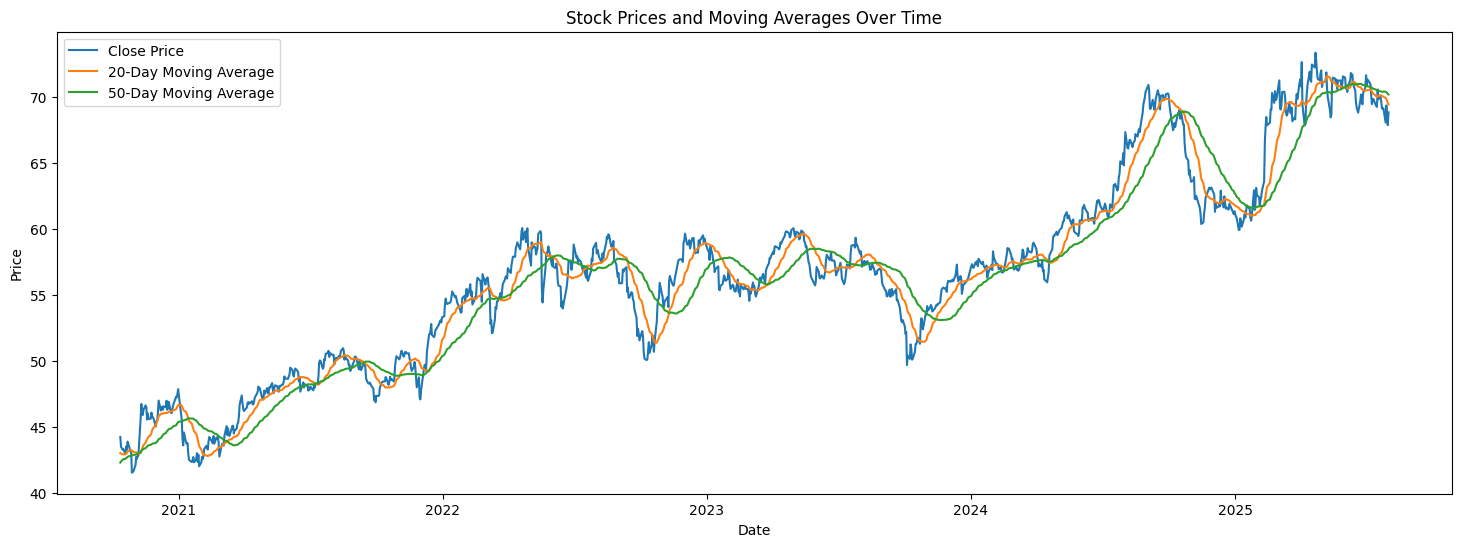

In [238]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=stock_data, x='Date', y='Close', label='Close Price')
sns.lineplot(data=stock_data, x='Date', y='MA20', label='20-Day Moving Average')
sns.lineplot(data=stock_data, x='Date', y='MA50', label='50-Day Moving Average')
plt.title('Stock Prices and Moving Averages Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

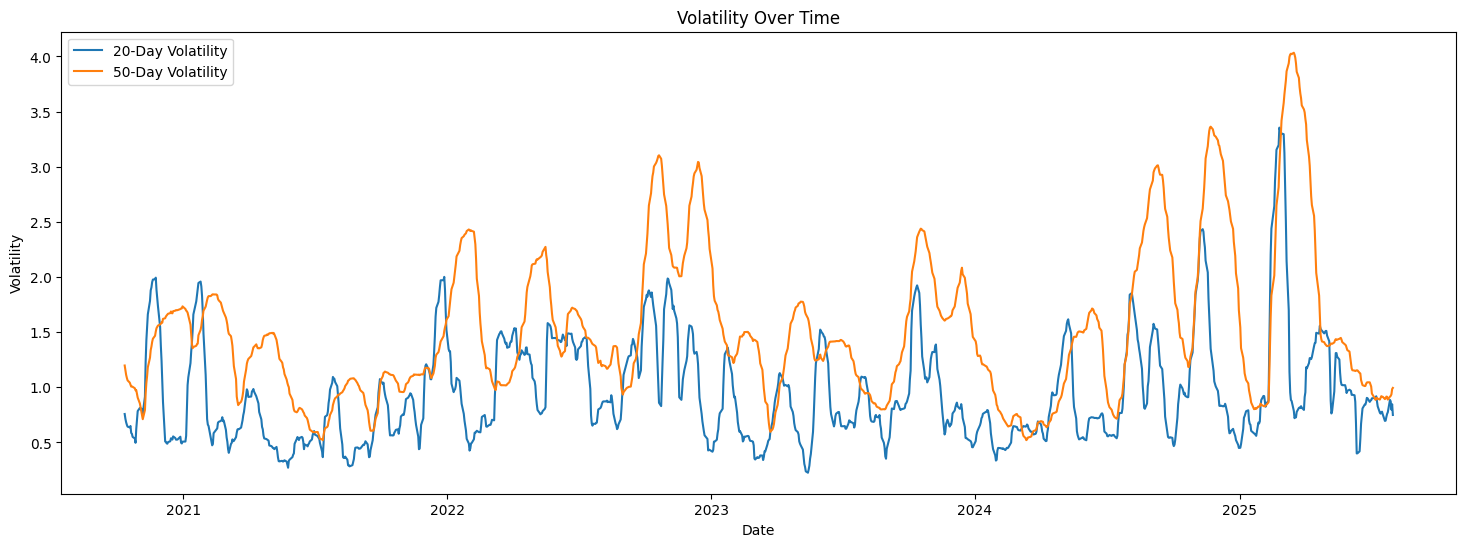

In [239]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=stock_data, x='Date', y='Volatility_20', label='20-Day Volatility')
sns.lineplot(data=stock_data, x='Date', y='Volatility_50', label='50-Day Volatility')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

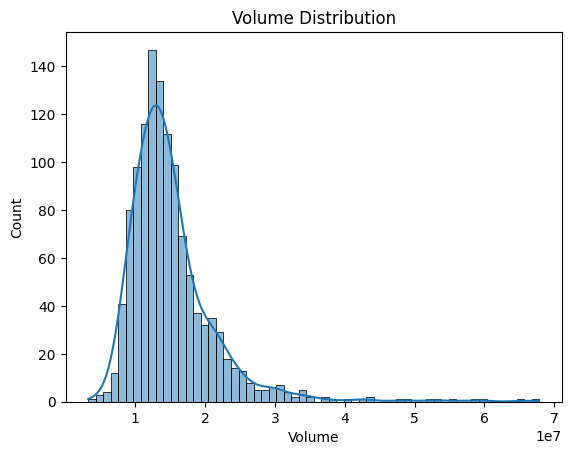

In [240]:
sns.histplot(data=stock_data,x='Volume',kde=True)
plt.title('Volume Distribution')
plt.show()

This distribution shows what is the general volume of the stock.

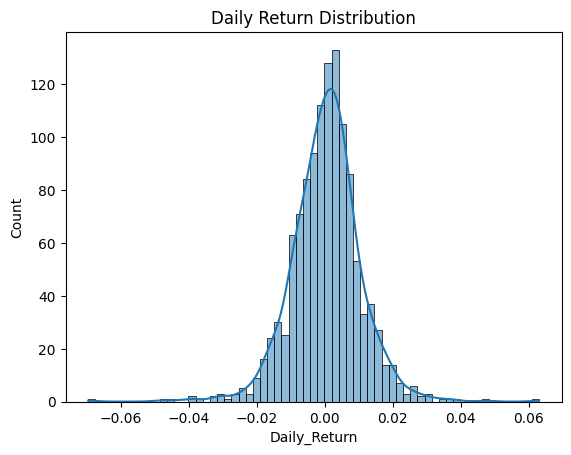

In [241]:
sns.histplot(data=stock_data,x='Daily_Return',kde=True)
plt.title('Daily Return Distribution')
plt.show()

This shows what is the distribution of the daily return in %

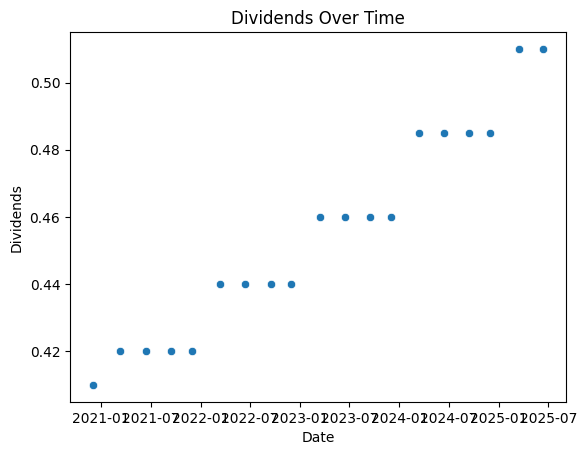

In [242]:
sns.scatterplot(data=stock_data[stock_data['Dividends']>0],x='Date',y='Dividends')
plt.title('Dividends Over Time')
plt.show()

##Modelling

Selecting Features for training

In [244]:
features=['Open', 'High', 'Low', 'Volume', 'MA20', 'MA50', 'Daily_Return', 'Volatility_20', 'Volatility_50', 'Dividends', 'Stock Splits']

In [245]:
X=stock_data[features]
y=stock_data['Close']

Splitting data to train and test

In [246]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=False)

Creating a pipeline

In [252]:
pipeline1=Pipeline(
    [
        ('model',RandomForestRegressor(n_estimators=100,random_state=1))
    ]
)

Evalulating Pipeline1

In [253]:
pipeline1.fit(X_train,y_train)

Pipeline(steps=[('model', RandomForestRegressor(random_state=1))])

In [254]:
y_pred1=pipeline1.predict(X_test)

In [255]:
mse1 = mean_squared_error(y_test, y_pred1)
mae1 = mean_absolute_error(y_test, y_pred1)

print(f"Mean Squared Error: {mse1}")
print(f"Mean Absolute Error: {mae1}")

Mean Squared Error: 10.205161515224848
Mean Absolute Error: 2.7492830112551854


In [256]:
R2_1=pipeline1.score(X_test,y_test)
print(R2_1)

0.27915176790049223


Finding best parameters using gridsearch

In [257]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'], # Number of features to consider when looking for the best split
    'max_depth': [10, 20, None], # Maximum depth of the tree (None means unlimited)
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False] # Whether bootstrap samples are used when building trees
}

In [258]:
rfr=RandomForestRegressor(random_state=1)

In [259]:
grid_search=GridSearchCV(estimator=rfr,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2,scoring='neg_mean_squared_error')

In [261]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [262]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

Best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Creating new pipeline based on these results

In [263]:
pipeline2=Pipeline([
    ('model',best_estimator)
])

In [264]:
pipeline2.fit(X_train,y_train)

Pipeline(steps=[('model',
                 RandomForestRegressor(bootstrap=False, max_depth=10,
                                       max_features='sqrt', min_samples_split=5,
                                       random_state=0))])

In [265]:
y_pred2=pipeline2.predict(X_test)

In [266]:
R2_2=pipeline2.score(X_test,y_test)
print(R2_2)

0.13821176041539995


In [267]:
mse2 = mean_squared_error(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)

print(f"Mean Squared Error: {mse2}")
print(f"Mean Absolute Error: {mae2}")

Mean Squared Error: 12.200471313173852
Mean Absolute Error: 3.0423989186309837


Comparison

In [268]:
print(f"\t Old \t\t\t  New \t\t\t  Difference")
print(f"MSE: {mse1:.5f} \t\t\t {mse2:.5f} \t\t {mse1-mse2:.5f}")
print(f"MAE: {mae1:.5f} \t\t\t {mae2:.5f} \t\t {mae1-mae2:.5f}")
print(f"R2: {R2_1:.5f} \t\t\t {R2_2:.5f} \t\t {R2_1 - R2_2:.5f}")

	 Old 			  New 			  Difference
MSE: 10.20516 			 12.20047 		 -1.99531
MAE: 2.74928 			 3.04240 		 -0.29312
R2: 0.27915 			 0.13821 		 0.14094


#Live Prediction

In [290]:
live_df=yf.download('KO',period='1d', interval='1m' ,auto_adjust=True,actions=True)
live_df.columns=live_df.columns.droplevel(level=1)
live_df.reset_index(inplace=True)
display(live_df.head())

[*********************100%***********************]  1 of 1 completed


Price,Datetime,Close,Dividends,High,Low,Open,Stock Splits,Volume
0,2025-08-01 13:30:00+00:00,68.709999,0.0,68.940002,68.430000,68.595001,0.0,630847
1,2025-08-01 13:31:00+00:00,68.514999,0.0,68.690002,68.459999,68.690002,0.0,131631
2,2025-08-01 13:32:00+00:00,68.650002,0.0,68.680000,68.500000,68.500000,0.0,134067
3,2025-08-01 13:33:00+00:00,68.775002,0.0,68.779999,68.620003,68.660004,0.0,77621
4,2025-08-01 13:34:00+00:00,68.760002,0.0,68.834999,68.750000,68.781403,0.0,67077


In [291]:
live_df['MA20'] = live_df['Close'].rolling(window=20).mean()
live_df['MA50'] = live_df['Close'].rolling(window=50).mean()

In [292]:
live_df['Volatility_20'] = live_df['Close'].rolling(window=20).std()
live_df['Volatility_50'] = live_df['Close'].rolling(window=50).std()

In [293]:
live_df['Daily_Return'] = live_df['Close'].pct_change()

In [294]:
live_df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-1640341796.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  live_df.fillna(method='ffill', inplace=True)


In [297]:
pred_features=live_df[features].iloc[-1:].dropna()
display(pred_features)

Price,Open,High,Low,Volume,MA20,MA50,Daily_Return,Volatility_20,Volatility_50,Dividends,Stock Splits
387,68.849998,68.879997,68.830002,476748,68.918531,68.879845,0.000073,0.031394,0.046961,0.0,0.0


In [304]:
live_prediction1=pipeline1.predict(pred_features)

In [305]:
live_prediction2=pipeline2.predict(pred_features)

In [322]:
print(f'Closing Prediction: \n\t\tPipeline1: {live_prediction1[0]:.2f} \n\t\tPipeline2: {live_prediction2[0]:.2f}')

Closing Prediction: 
		Pipeline1: 65.93 
		Pipeline2: 65.01
